In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the Data

# Load the Excel file
df = pd.read_csv('C:\\Users\\malki\\Downloads\\Week 1\\Hackathon_Ideal_Data.csv')

# Display the first few rows to understand the structure
print(df.head())


  MONTH STORECODE  QTY  VALUE                GRP               SGRP  \
0    M1        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1    M1        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2    M1        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3    M1        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
4    M1        P2    0      0  HAIR CONDITIONERS  HAIR CONDITIONERS   

               SSGRP                         CMP         MBRD  \
0  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
1  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
2  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
3  HAIR CONDITIONERS               L'OREAL INDIA      GARNIER   
4  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED  CLINIC PLUS   

                     BRD  
0  DOVE HAIR FALL RESCUE  
1    DOVE INTENSE REPAIR  
2   DOVE OXYGEN MOISTURE  
3                FRUCTIS  
4            CLINIC PLUS  


In [3]:
print(f"Data Shape: {df.shape}")


Data Shape: (14260, 10)


In [4]:
# Understand the Data Structure

# Get an overview of the data
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 5   SGRP       14260 non-null  object
 6   SSGRP      14260 non-null  object
 7   CMP        14260 non-null  object
 8   MBRD       14260 non-null  object
 9   BRD        14260 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB
None
                QTY         VALUE
count  14260.000000  14260.000000
mean      16.354488    294.455330
std       34.365583    760.129558
min        0.000000      0.000000
25%        1.000000     10.000000
50%        4.000000     99.000000
75%       16.000000    283.000000
max      641.000000  24185.000000
MONTH        0
STORECODE    0
QTY          0
VALUE        0
GR

In [5]:
# Data Cleaning

# Dropping duplicate rows if any
df.drop_duplicates(inplace=True)

# Fill or drop missing values if necessary
df.fillna(0, inplace=True)  # Or df.dropna() based on the situation

# Ensure consistent column naming (e.g., strip spaces, lower case)
df.columns = df.columns.str.strip().str.lower()

# Check the cleaned data
print(df.head())


  month storecode  qty  value                grp               sgrp  \
0    M1        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1    M1        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2    M1        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3    M1        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
4    M1        P2    0      0  HAIR CONDITIONERS  HAIR CONDITIONERS   

               ssgrp                         cmp         mbrd  \
0  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
1  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
2  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
3  HAIR CONDITIONERS               L'OREAL INDIA      GARNIER   
4  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED  CLINIC PLUS   

                     brd  
0  DOVE HAIR FALL RESCUE  
1    DOVE INTENSE REPAIR  
2   DOVE OXYGEN MOISTURE  
3                FRUCTIS  
4            CLINIC PLUS  


In [6]:
# Display missing values percentage for each column
missing_percentage = df.isnull().mean() * 100
print("Missing Values Percentage:\n", missing_percentage)


Missing Values Percentage:
 month        0.0
storecode    0.0
qty          0.0
value        0.0
grp          0.0
sgrp         0.0
ssgrp        0.0
cmp          0.0
mbrd         0.0
brd          0.0
dtype: float64


In [7]:
# Data Transformation

# Convert 'MONTH' to a more readable format if needed
# Assuming M1, M2, M3 corresponds to actual months, map them
month_mapping = {'M1': 'January', 'M2': 'February', 'M3': 'March'}
df['month'] = df['month'].map(month_mapping)

# Create any new features if needed
# For example, calculate average price per quantity
df['avg_price'] = df['value'] / df['qty']

# Check the transformed data
print(df.head())


     month storecode  qty  value                grp               sgrp  \
0  January        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1  January        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2  January        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3  January        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
4  January        P2    0      0  HAIR CONDITIONERS  HAIR CONDITIONERS   

               ssgrp                         cmp         mbrd  \
0  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
1  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
2  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
3  HAIR CONDITIONERS               L'OREAL INDIA      GARNIER   
4  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED  CLINIC PLUS   

                     brd  avg_price  
0  DOVE HAIR FALL RESCUE   3.320000  
1    DOVE INTENSE REPAIR   3.666667  
2   DOVE OXYGEN MOISTURE   3.750000  
3           

In [8]:
df['total_sales'] = df.groupby('storecode')['value'].transform('sum')
df['average_transaction_value'] = df['value'] / df['qty']


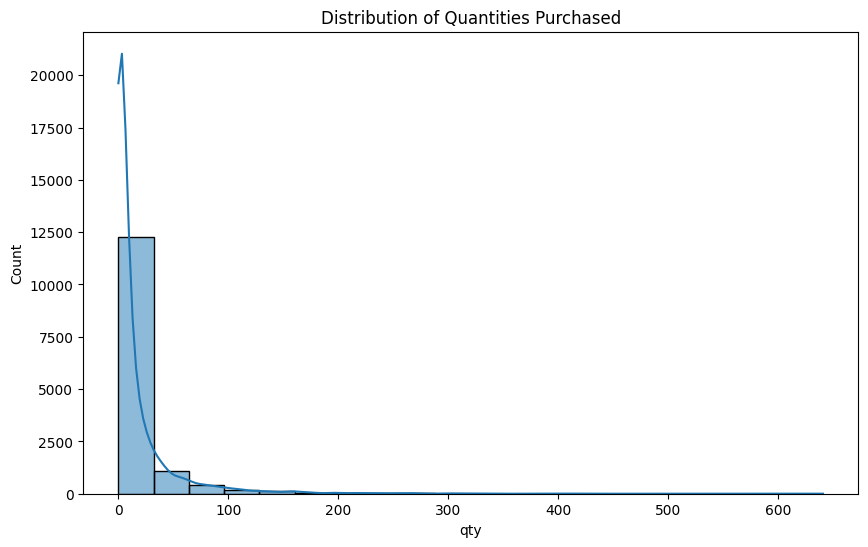

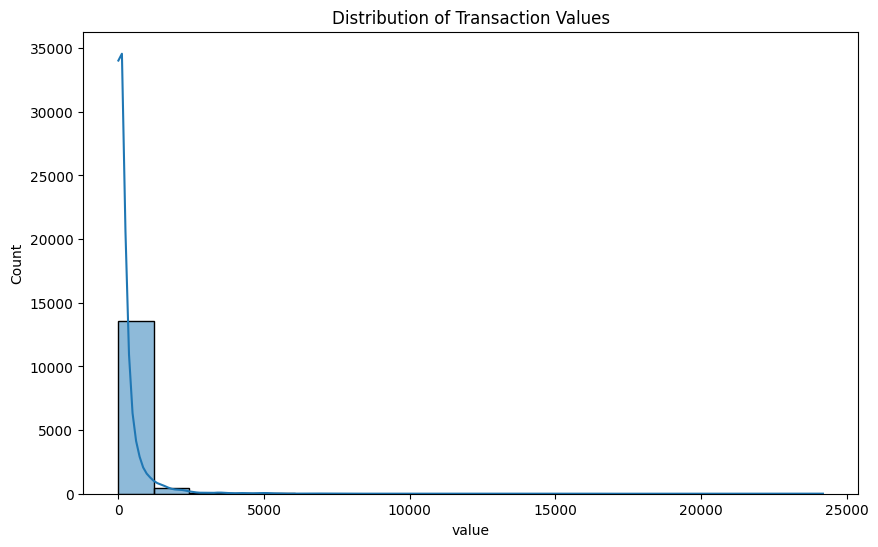

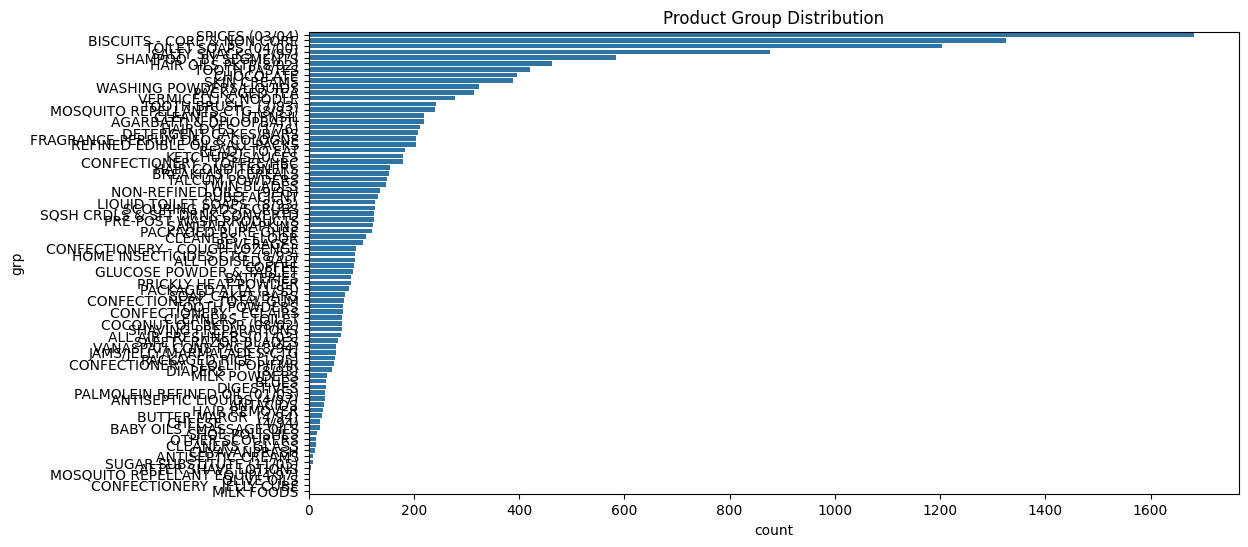

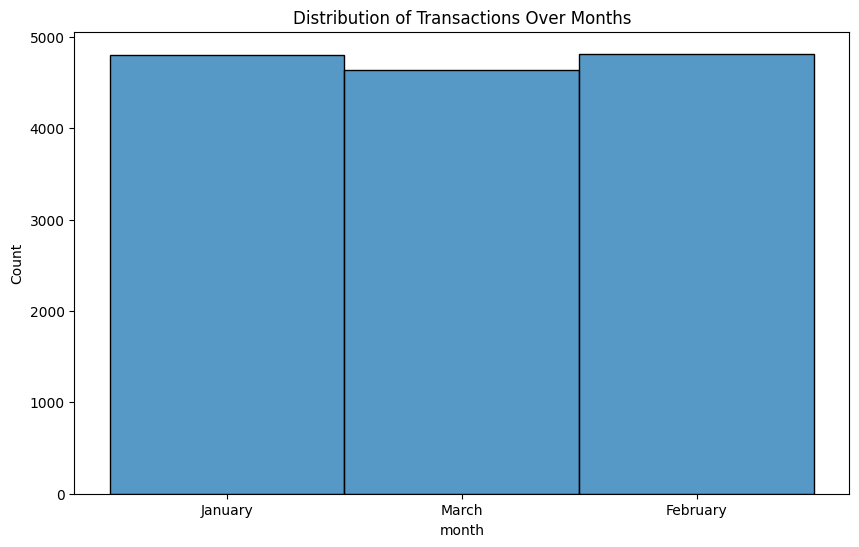

In [9]:
# Univariate Analysis

# Distribution of quantities purchased
plt.figure(figsize=(10, 6))
sns.histplot(df['qty'], bins=20, kde=True)
plt.title('Distribution of Quantities Purchased')
plt.show()

# Distribution of Values
plt.figure(figsize=(10, 6))
sns.histplot(df['value'], bins=20, kde=True)
plt.title('Distribution of Transaction Values')
plt.show()

# Analyzing different product groups
plt.figure(figsize=(12, 6))
sns.countplot(y='grp', data=df, order=df['grp'].value_counts().index)
plt.title('Product Group Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['month'], bins=3, kde=False)
plt.title('Distribution of Transactions Over Months')
plt.show()



1) The majority of purchases are small in quantity, with a few large transactions, highlighting opportunities to boost sales through strategies targeting low-quantity buyers.
2) The majority of transactions have low monetary values, with only a few high-value transactions, indicating a focus on small-scale purchases.
3) The most frequently purchased product groups are "BISCUITS - CORE & NON CORE" and "SPICES," indicating strong customer preference for these categories.
4) The most frequently purchased product groups are "BISCUITS - CORE & NON CORE" and "SPICES," indicating strong customer preference for these categories.
5) The bar chart shows that the number of transactions in March is slightly lower than in January and February. This could indicate a seasonal trend or other factors influencing customer behavior during that month.

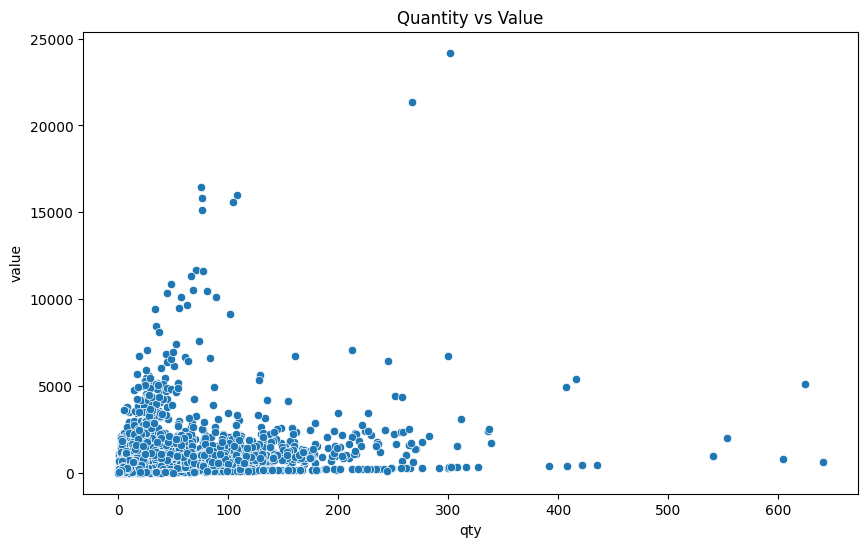

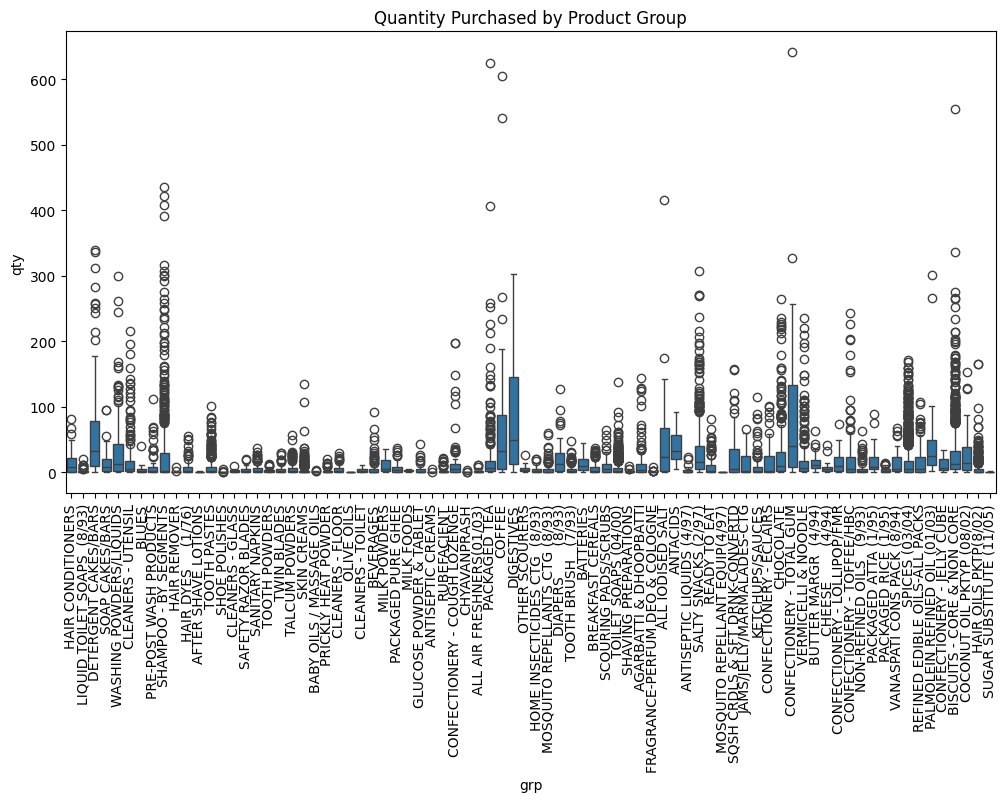

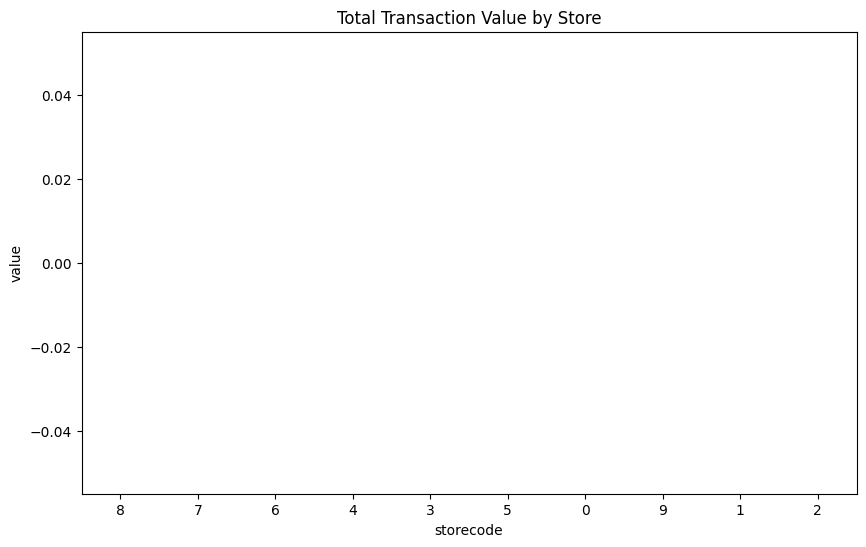

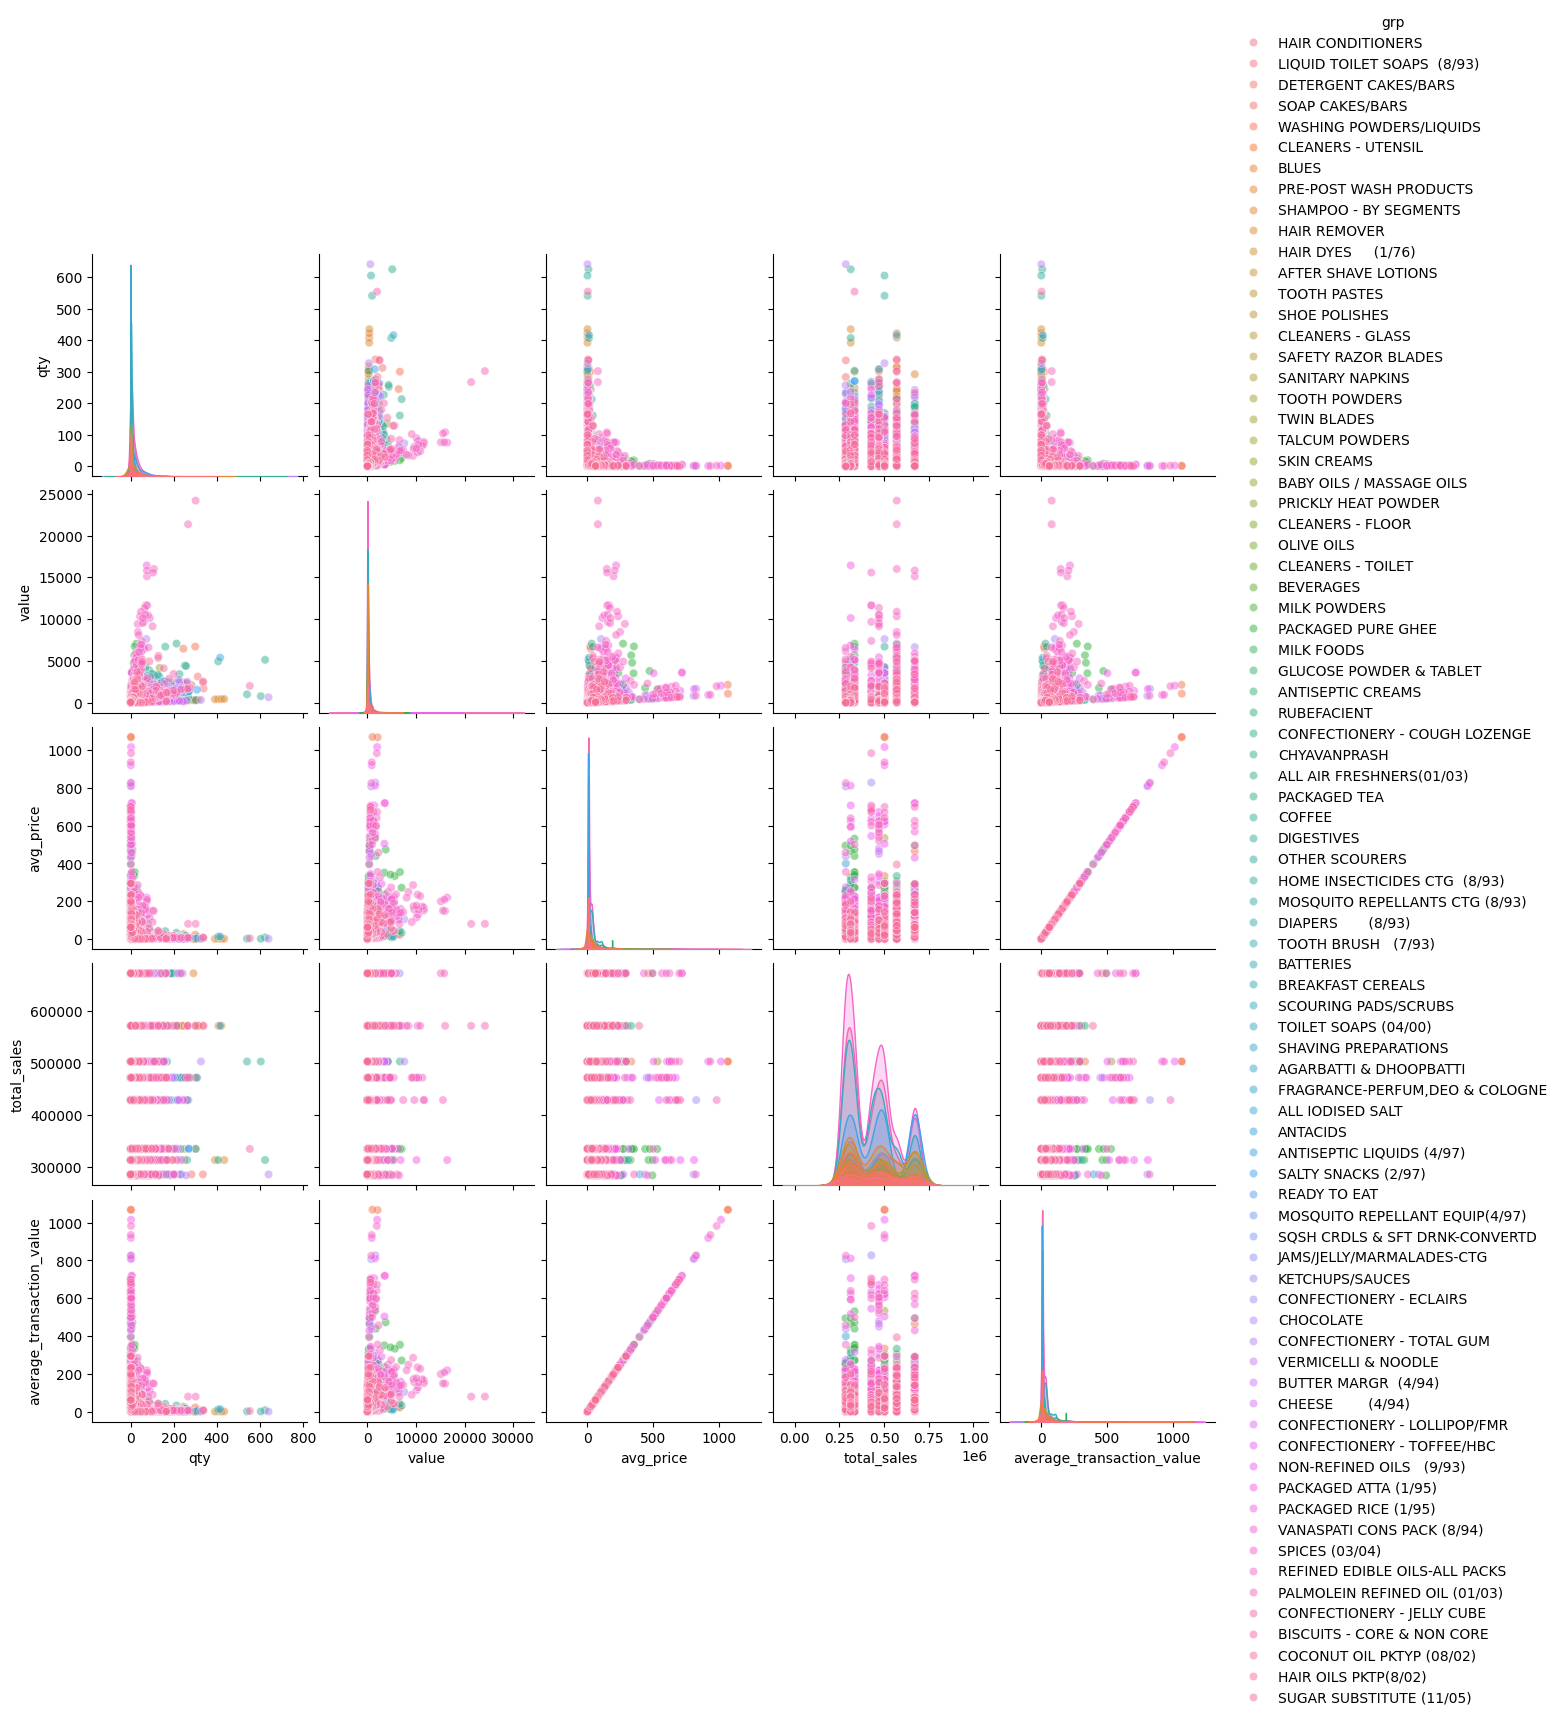

In [10]:
# Bivariate Analysis

# Relationship between Quantity and Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='qty', y='value', data=df)
plt.title('Quantity vs Value')
plt.show()

# Relationship between Quantity and GRP (Product Groups)
plt.figure(figsize=(12, 6))
sns.boxplot(x='grp', y='qty', data=df)
plt.xticks(rotation=90)
plt.title('Quantity Purchased by Product Group')
plt.show()

# Relationship between Store Codes and Total Value
store_values = df.groupby('storecode')['value'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='storecode', y='value', data=store_values, order=store_values['value'].sort_values(ascending=False).index)
plt.title('Total Transaction Value by Store')
plt.show()

sns.pairplot(df, hue='grp', plot_kws={'alpha':0.5})
plt.show()



1) The scatter plot shows a general positive relationship between the quantity of items purchased and the total transaction value, but there are some exceptions where a small quantity of items can lead to a high value.
2) The box plot provides a visual representation of the distribution of quantities purchased for each product group, helping to identify patterns and variations in customer purchasing behavior.


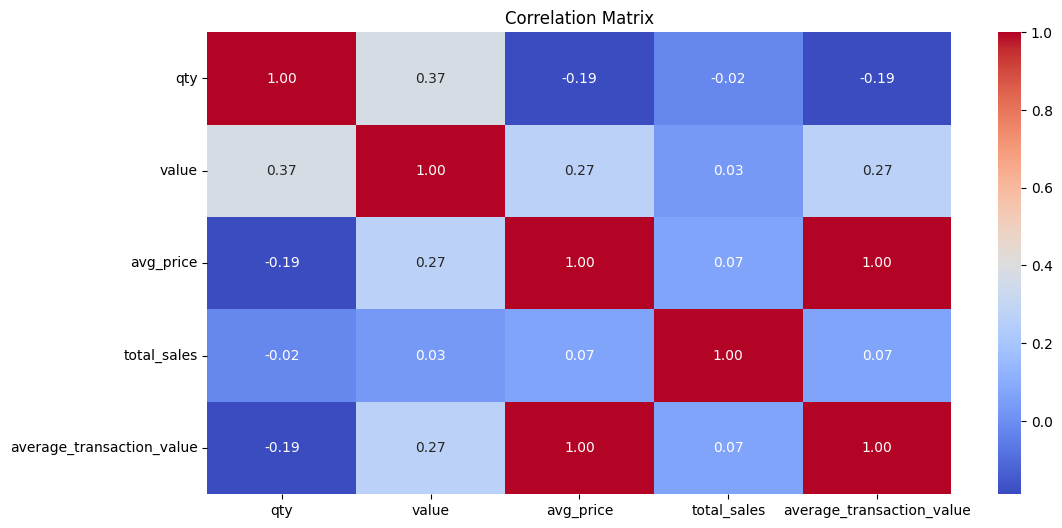

In [11]:
# Multivariate Analysis

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Heatmap of Correlations between Numerical Features
plt.figure(figsize=(12, 6))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Overall idea : The correlation matrix shows that quantity and value have a moderate positive correlation, while quantity and average price have a weak negative correlation. Value and average price, as well as average price and average transaction value, have strong positive correlations, while the relationships between total sales and other variables are generally weak.

qty and value: There's a moderate positive correlation (0.37) between quantity and value, indicating that as the quantity of items purchased increases, the total transaction value tends to increase as well.

qty and avg_price: There's a weak negative correlation (-0.19) between quantity and average price, suggesting that when customers buy larger quantities, they might be purchasing items at a slightly lower average price.

qty and total_sales: There's a very weak negative correlation (-0.02) between quantity and total sales. This relationship is likely not significant.
qty and average_transaction_value: There's a moderate negative correlation (-0.19) between quantity and average transaction value, indicating that when customers buy larger quantities, the average value per transaction might be slightly lower.

value and avg_price: There's a strong positive correlation (0.27) between value and average price, suggesting that higher-value transactions are associated with higher average prices.

value and total_sales: There's a weak positive correlation (0.03) between value and total sales, indicating a slight positive relationship between transaction value and total sales.

value and average_transaction_value: There's a strong positive correlation (0.27) between value and average transaction value, suggesting that higher-value transactions are associated with higher average transaction values.

avg_price and total_sales: There's a weak positive correlation (0.07) between average price and total sales, indicating a slight positive relationship between average price and total sales.

avg_price and average_transaction_value: There's a strong positive correlation (1.00) between average price and average transaction value, which makes sense as they are directly related.

total_sales and average_transaction_value: There's a weak positive correlation (0.07) between total sales and average transaction value, indicating a slight positive relationship between total sales and average transaction value.

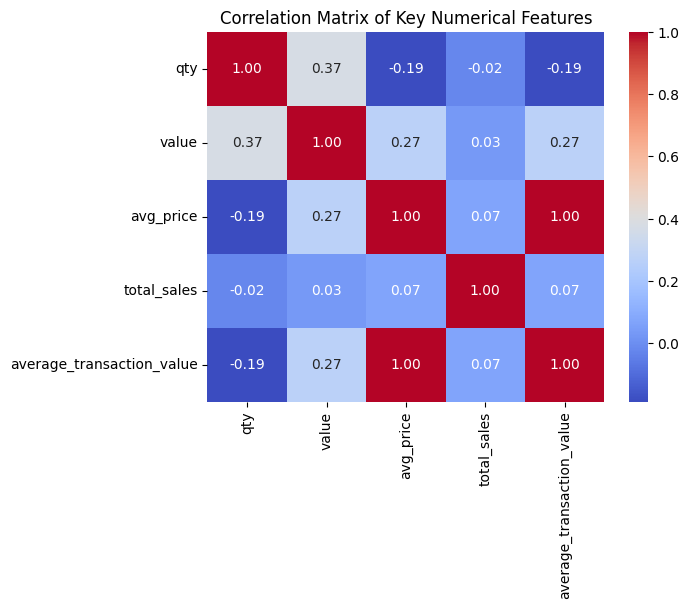

In [12]:
corr = df[['qty', 'value', 'avg_price', 'total_sales', 'average_transaction_value']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Numerical Features')
plt.show()


The correlation matrix shows that quantity and value have a moderate positive correlation, while quantity and average price have a weak negative correlation. Value and average price, as well as average price and average transaction value, have strong positive correlations, while the relationships between total sales and other variables are generally weak.

In [13]:
print(f"Unique GRP Categories: {df['grp'].nunique()}")
print(f"Unique SGRP Categories: {df['sgrp'].nunique()}")


Unique GRP Categories: 80
Unique SGRP Categories: 177


C:\Users\malki\AppData\Local\Temp\ipykernel_23696\2652366468.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='value', index='grp', columns='sgrp', aggfunc=np.sum, fill_value=0)
C:\Users\malki\AppData\Local\Temp\ipykernel_23696\2652366468.py:6: FutureWarning: The provided callable <function sum at 0x0000021838A089A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = df.pivot_table(values='value', index='grp', columns='sgrp', aggfunc=np.sum, fill_value=0)


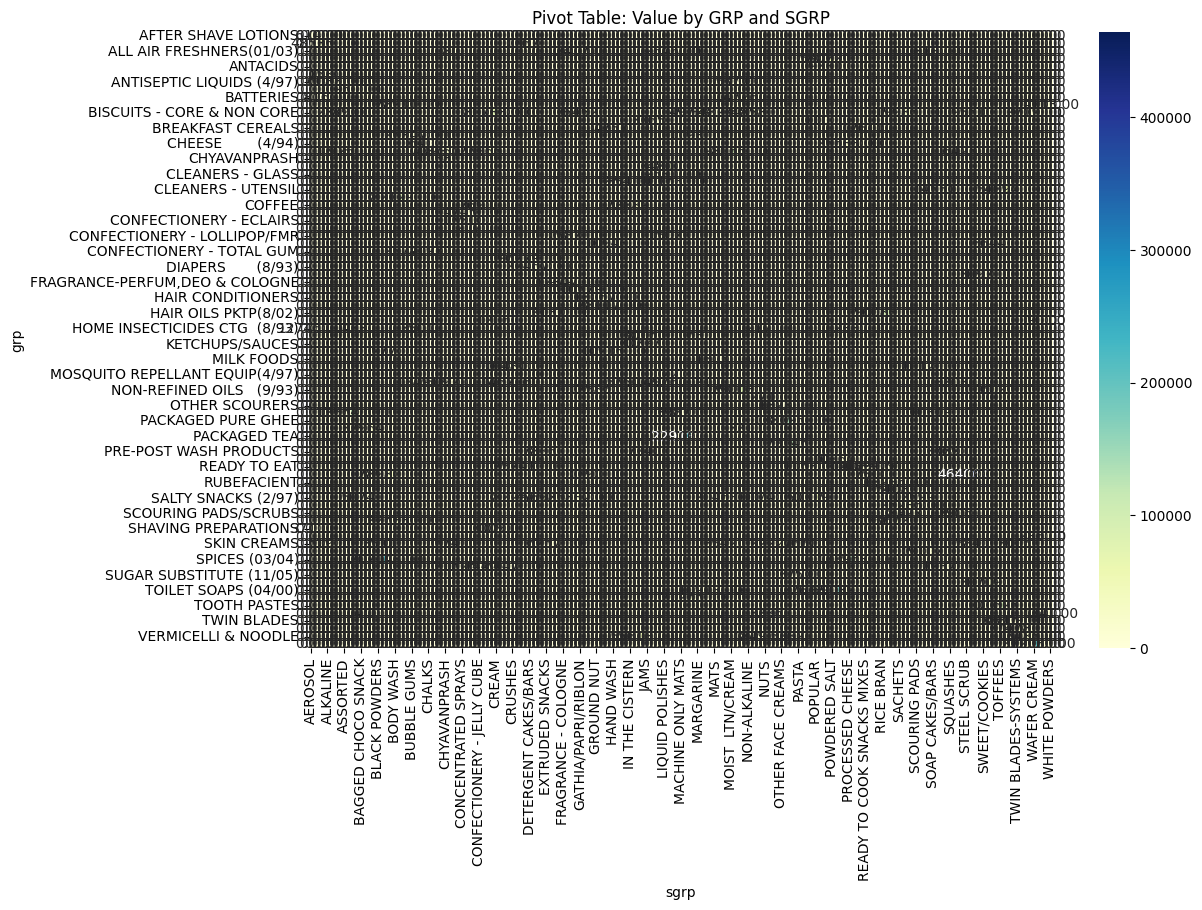

In [14]:
# Ensure 'GRP' and 'SGRP' are treated as categorical variables
df['grp'] = df['grp'].astype('category')
df['sgrp'] = df['sgrp'].astype('category')

# Pivot table to understand the relationship between GRP, SGRP, and Value
pivot_table = df.pivot_table(values='value', index='grp', columns='sgrp', aggfunc=np.sum, fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Pivot Table: Value by GRP and SGRP')
plt.show()


The heatmap shows the total value of transactions for each product group and sub-group, revealing that certain product groups and sub-groups have higher sales performance than others.

Product Groups with Highest Total Value: The product groups with the highest total transaction values are concentrated in the top left corner of the heatmap. These groups likely include popular and high-demand products.

Sub-Groups with Highest Total Value: Within each product group, certain sub-groups may have significantly higher total values. These sub-groups could represent specific product variants or brands that are particularly popular.

Product Groups with Low Total Value: The product groups with the lowest total transaction values are concentrated in the bottom right corner of the heatmap. These groups may be less popular or have lower demand.

Product Groups with Consistent Performance: Some product groups have relatively consistent total values across most sub-groups, indicating a more balanced distribution of demand within these groups.

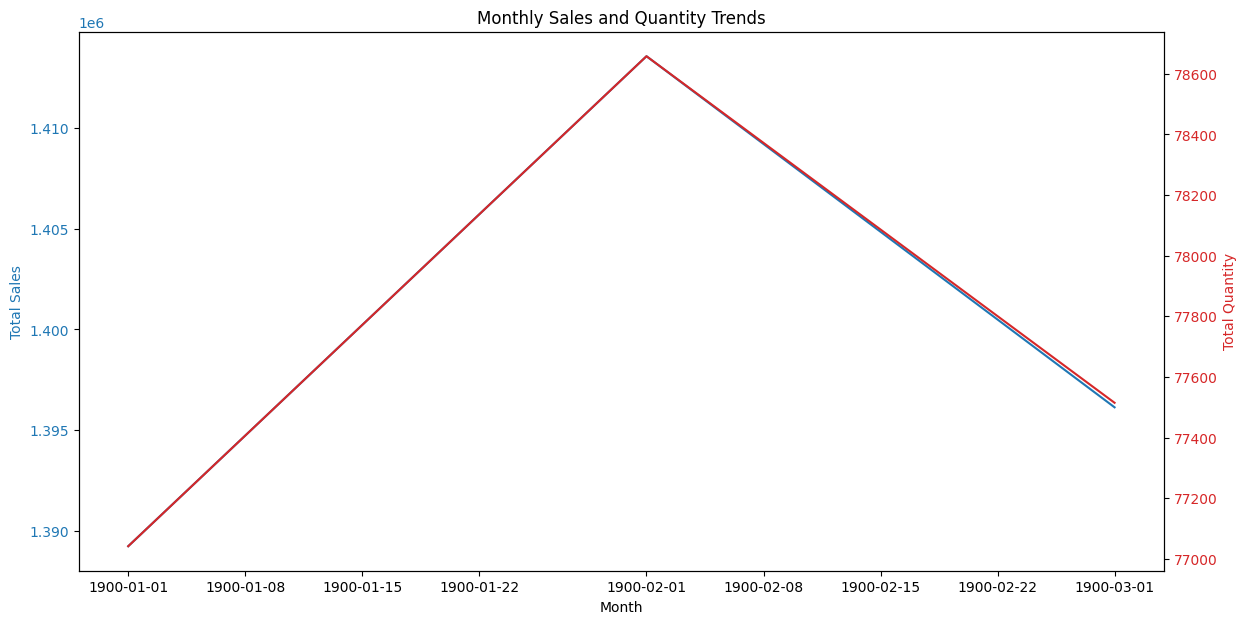

In [15]:
# Analyzing Purchase Trends Over Time

# Convert 'month' to datetime format for better plotting
df['month'] = pd.to_datetime(df['month'], format='%B')

# Aggregate data by month
monthly_sales = df.groupby(df['month'].dt.to_period('M')).agg({'value': 'sum', 'qty': 'sum'}).reset_index()
monthly_sales['month'] = monthly_sales['month'].dt.to_timestamp()

# Plot total sales and quantities over time
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales', color=color)
ax1.plot(monthly_sales['month'], monthly_sales['value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Quantity', color=color)
ax2.plot(monthly_sales['month'], monthly_sales['qty'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monthly Sales and Quantity Trends')
plt.show()


The line chart shows a clear upward trend in both total sales and total quantity from January to mid-February, followed by a sharp decline in both metrics from mid-February to March. This suggests that there was a surge in sales and quantity during the first half of February, followed by a significant drop in demand or supply during the latter part of the month.

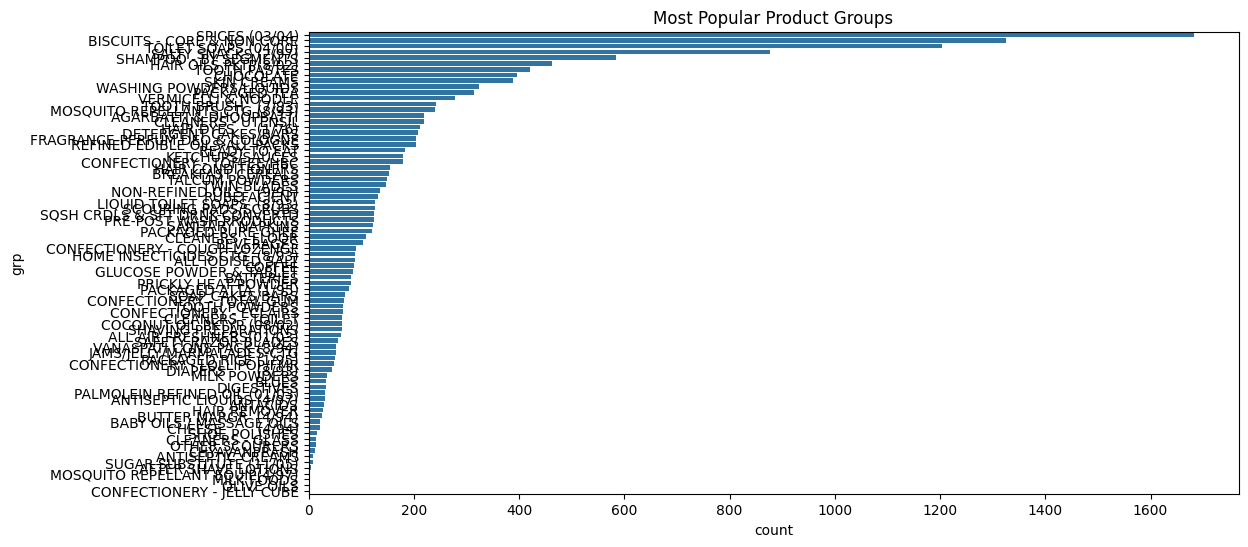

C:\Users\malki\AppData\Local\Temp\ipykernel_10844\1109969452.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x='value', y='grp', data=df.groupby('grp')['value'].sum().reset_index(), order=df.groupby('grp')['value'].sum().sort_values(ascending=False).index)
C:\Users\malki\AppData\Local\Temp\ipykernel_10844\1109969452.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x='value', y='grp', data=df.groupby('grp')['value'].sum().reset_index(), order=df.groupby('grp')['value'].sum().sort_values(ascending=False).index)


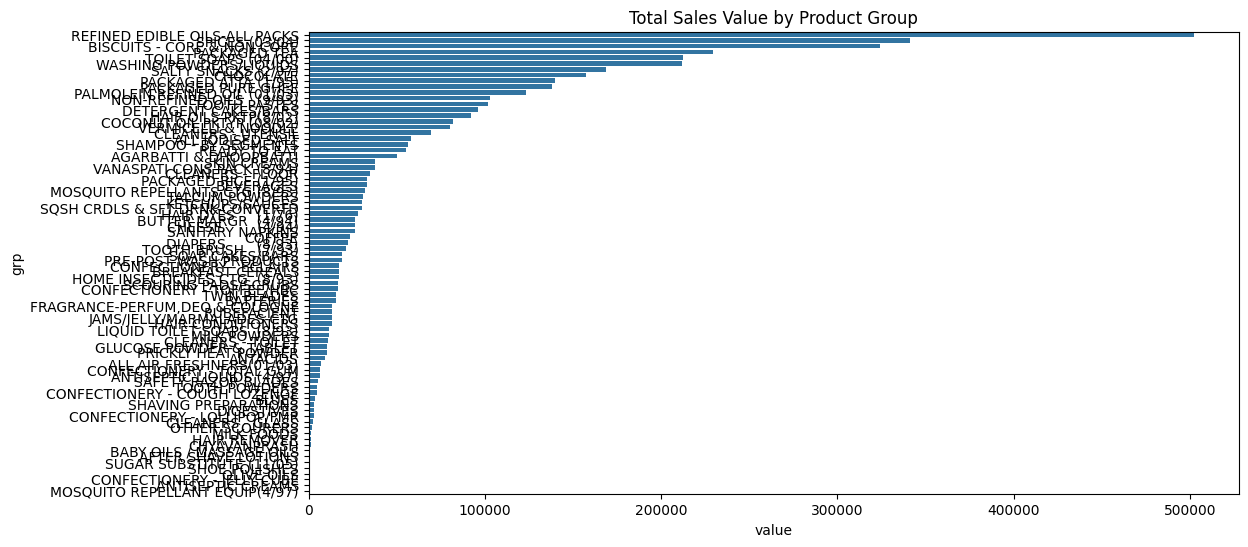

C:\Users\malki\AppData\Local\Temp\ipykernel_10844\1109969452.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x='value', y='sgrp', data=df.groupby('sgrp')['value'].sum().reset_index(), order=df.groupby('sgrp')['value'].sum().sort_values(ascending=False).index)
C:\Users\malki\AppData\Local\Temp\ipykernel_10844\1109969452.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x='value', y='sgrp', data=df.groupby('sgrp')['value'].sum().reset_index(), order=df.groupby('sgrp')['value'].sum().sort_values(ascending=False).index)


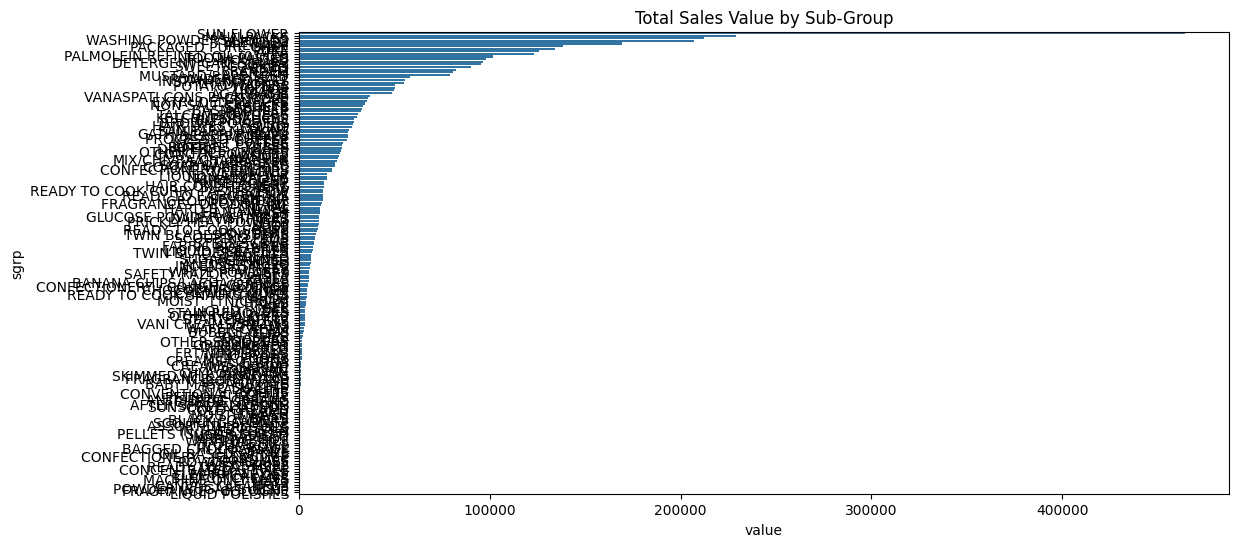

In [16]:
# Most Popular Product Groups
plt.figure(figsize=(12, 6))
sns.countplot(y='grp', data=df, order=df['grp'].value_counts().index)
plt.title('Most Popular Product Groups')
plt.show()

# Distribution of Sales Value by Product Group
plt.figure(figsize=(12, 6))
sns.barplot(x='value', y='grp', data=df.groupby('grp')['value'].sum().reset_index(), order=df.groupby('grp')['value'].sum().sort_values(ascending=False).index)
plt.title('Total Sales Value by Product Group')
plt.show()

# Sales Value by SGRP
plt.figure(figsize=(12, 6))
sns.barplot(x='value', y='sgrp', data=df.groupby('sgrp')['value'].sum().reset_index(), order=df.groupby('sgrp')['value'].sum().sort_values(ascending=False).index)
plt.title('Total Sales Value by Sub-Group')
plt.show()


1 st graph

   1. Most Popular Product Group: The product group with the highest count is "BISCUITS," followed by "SHAMPOO" and "MOSQUITO REPELLENT EQUIP & FOGS."

   2. Other Popular Groups: Other popular groups include "WASHING POWDERS/LIQUIDS," "TOILET SOAPS (04/00)," and "CONFECTIONERY - TOTAL GUMS."

   3. Less Popular Groups: Product groups such as "VERMICELLI & NOODLES" and "SUGAR SUBSTITUTES (11/05)" have relatively low counts, indicating they          are less popular.

2 nd graph

   1. Top-performing Product Groups: The product groups at the top of the chart have the highest total sales values, indicating they are the most             successful in terms of revenue generation.

   2. Product Groups with Lower Sales: The product groups at the bottom of the chart have lower total sales values, suggesting they may need further          analysis or improvement to increase their revenue contribution.

   3. Comparison of Product Groups: The chart allows for easy comparison of the relative sales performance of different product groups, identifying           which ones are driving the most revenue and which ones may be underperforming.


3 rd graph

   1. Top-performing Sub-Groups: The sub-groups at the top of the chart have the highest total sales values, indicating they are the most successful in       terms of revenue generation.

   2. Sub-Groups with Lower Sales: The sub-groups at the bottom of the chart have lower total sales values, suggesting they may need further analysis         or improvement to increase their revenue contribution.

   3. Comparison of Sub-Groups: The chart allows for easy comparison of the relative sales performance of different sub-groups within the same product        group, identifying which ones are driving the most revenue and which ones may be underperforming.

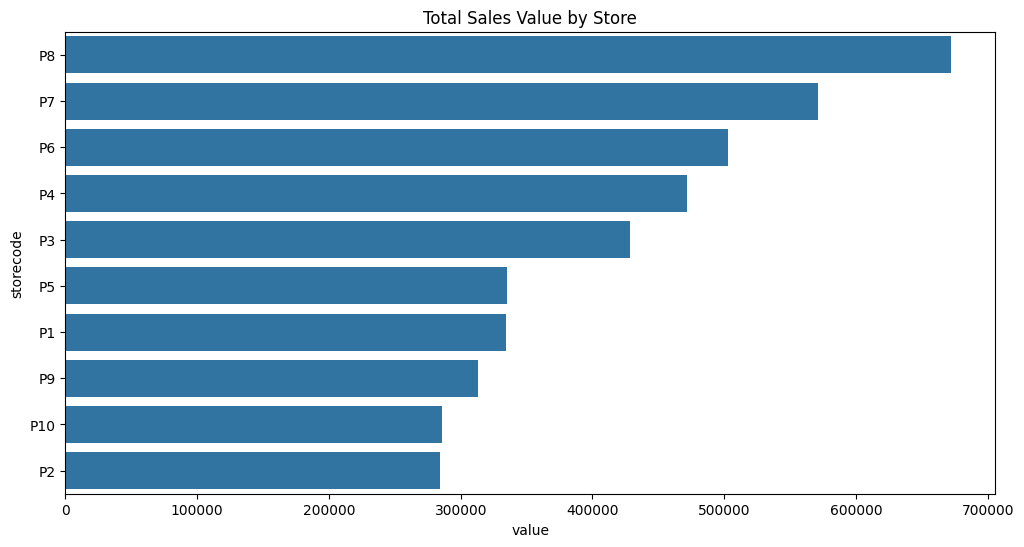

In [17]:
# Distribution of Sales by Store
plt.figure(figsize=(12, 6))
sns.barplot(x='value', y='storecode', data=df.groupby('storecode')['value'].sum().reset_index(), order=df.groupby('storecode')['value'].sum().sort_values(ascending=False).index)
plt.title('Total Sales Value by Store')
plt.show()


1) Store P8 has the highest total sales value, indicating it is the top-performing store.
2) Stores P7, P6, and P4 also have relatively high total sales values, suggesting they are also performing well.
3) Stores P3, P5, P1, P9, P10, and P2 have lower total sales values, indicating they may need further analysis or improvement to increase their revenue contribution.

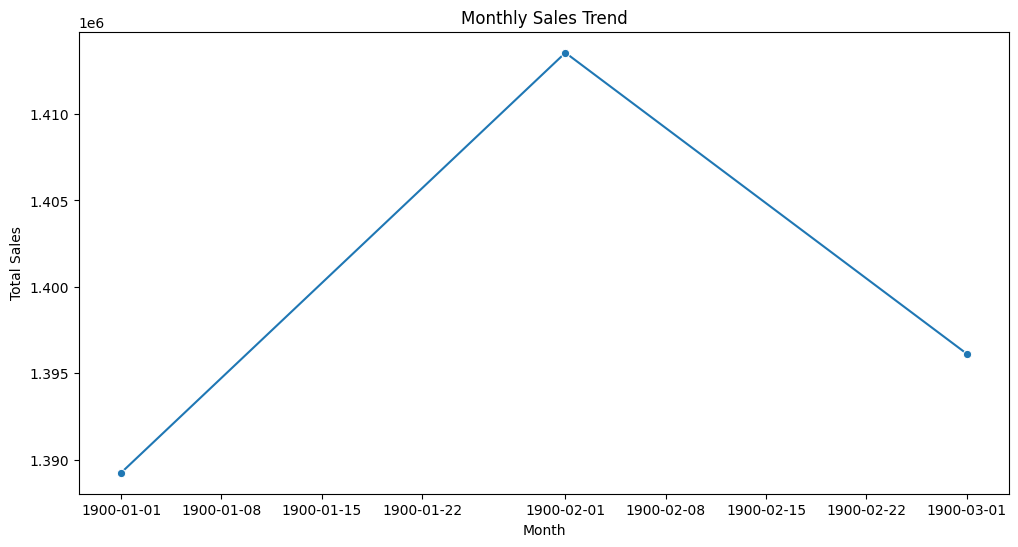

In [16]:
# Aggregating by Month
monthly_sales = df.groupby('month')['value'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='value', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


The line chart shows a clear upward trend in total sales from January to mid-February, followed by a sharp decline from mid-February to March. This suggests a significant increase in sales during the first half of February, followed by a decrease in demand or supply during the latter part of the month.

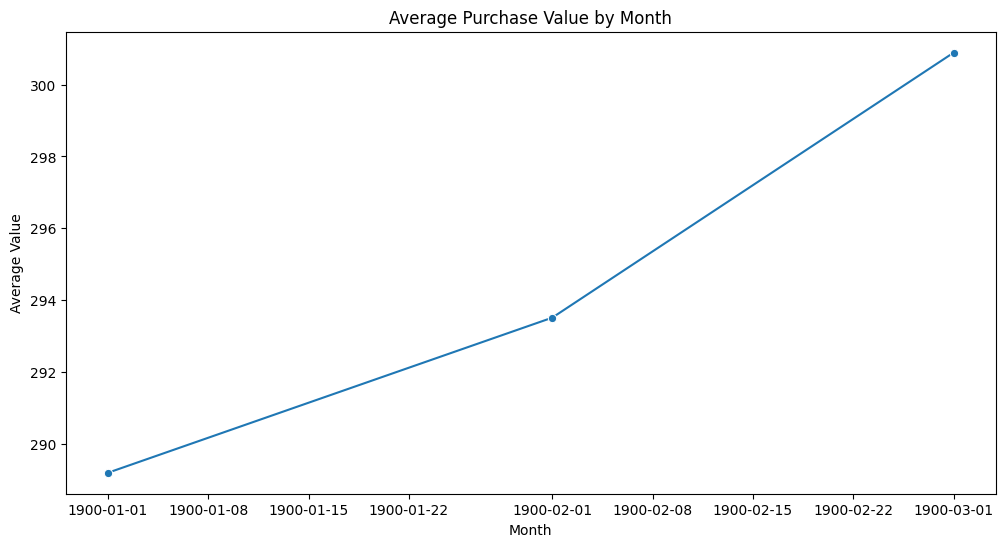

In [66]:
# Average Purchase Value by Month
avg_monthly_sales = df.groupby('month')['value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='value', data=avg_monthly_sales, marker='o')
plt.title('Average Purchase Value by Month')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.show()


The line chart shows a clear upward trend in the average purchase value from January to March. This indicates that customers were spending more on average as the month progressed.

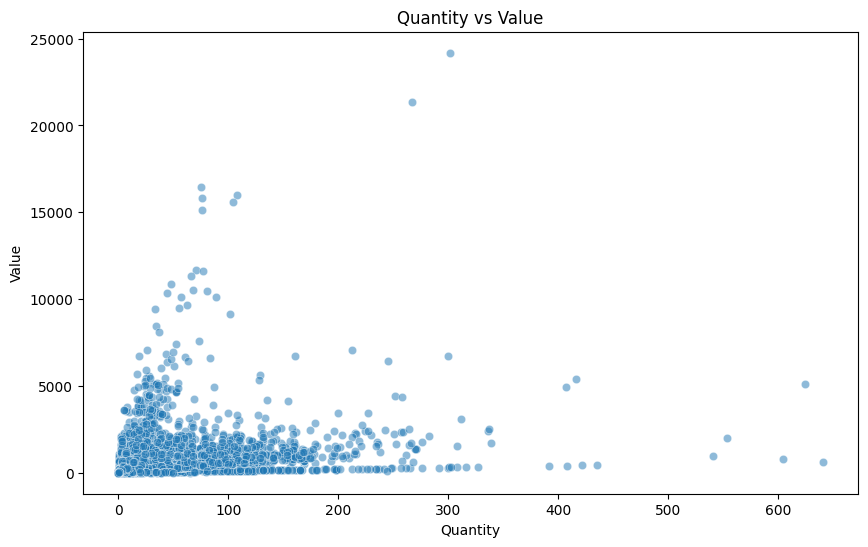

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='qty', y='value', data=df, alpha=0.5)
plt.title('Quantity vs Value')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.show()


The scatter plot titled "Quantity vs Value" shows a general positive correlation between the quantity of items purchased and the total value of the transaction. This indicates that, as the quantity of items increases, the total value tends to increase as well. However, there are also some outliers, particularly in the upper right corner of the plot, suggesting that there are instances where a relatively small quantity of items results in a high transaction value. This could be due to factors such as purchasing high-value items or bulk purchases of expensive products.

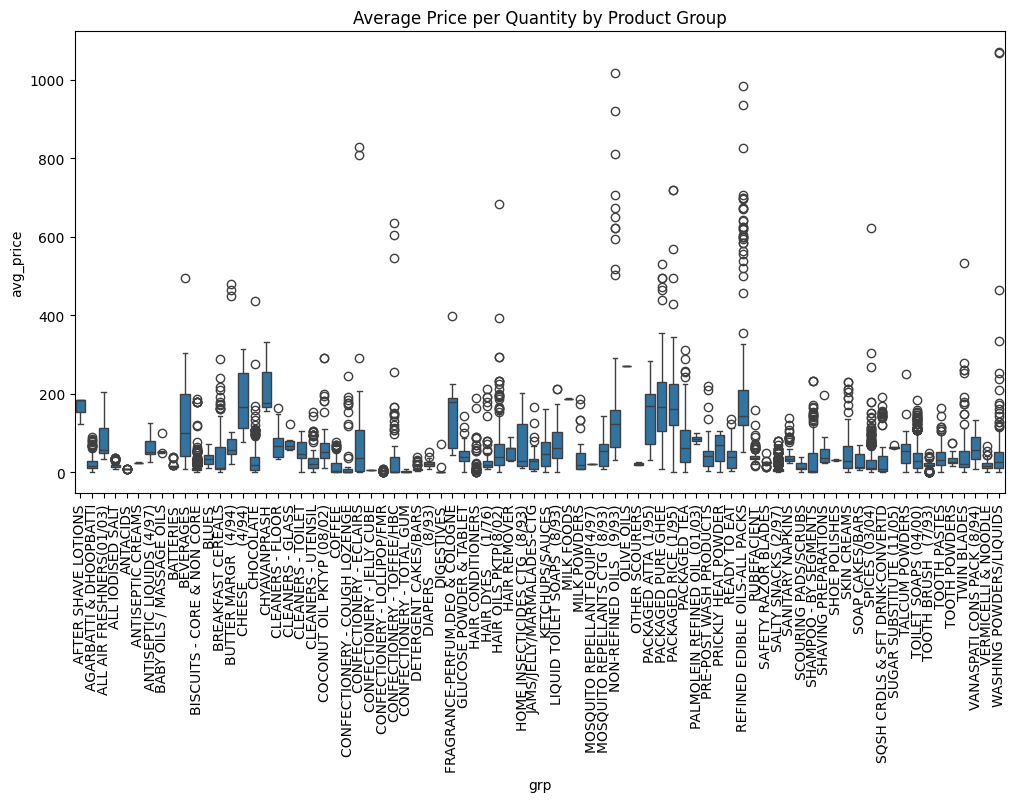

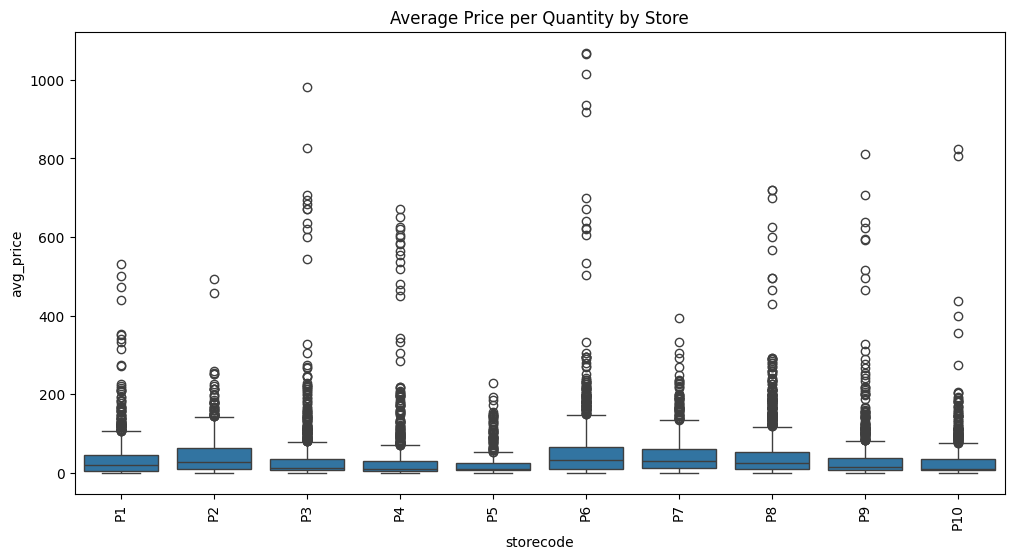

In [17]:
# Average Price by Product Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='grp', y='avg_price', data=df)
plt.xticks(rotation=90)
plt.title('Average Price per Quantity by Product Group')
plt.show()

# Average Price by Store
plt.figure(figsize=(12, 6))
sns.boxplot(x='storecode', y='avg_price', data=df)
plt.xticks(rotation=90)
plt.title('Average Price per Quantity by Store')
plt.show()


1 st scatter plot 

Variation in average prices: The box plots vary in height and position, indicating that average prices differ significantly across product groups.
Outliers: Several product groups have outliers, suggesting that some products have unusually high or low average prices compared to the rest of the group.
Median average prices: The median average price (represented by the line within each box) varies across product groups, with some groups having higher median average prices than others.
Distribution shapes: The shape of the boxes and whiskers provides information about the distribution of average prices within each group. For example, some groups have a more symmetrical distribution (e.g., "TOILET SOAPS (04/00)"), while others have a skewed distribution (e.g., "HAIR CONDITIONERS").

2 nd scatter plot

Variation in average prices: The box plots vary in height and position, indicating that average prices differ significantly across stores.
Outliers: Several stores have outliers, suggesting that some stores have unusually high or low average prices compared to the rest of the stores.
Median average prices: The median average price (represented by the line within each box) varies across stores, with some stores having higher median average prices than others.
Distribution shapes: The shape of the boxes and whiskers provides information about the distribution of average prices within each store. For example, some stores have a more symmetrical distribution (e.g., Store P1), while others have a skewed distribution (e.g., Store P8).

In [18]:
# Summary of findings
summary = {
    'total_transactions': len(df),
    'total_value': df['value'].sum(),
    'most_popular_product_group': df['grp'].value_counts().idxmax(),
    'store_with_highest_value': store_values.iloc[0]['storecode'],
    'average_quantity_per_transaction': df['qty'].mean(),
}

print("Summary of Findings:")
for key, value in summary.items():
    print(f"{key}: {value}")

Summary of Findings:
total_transactions: 14260
total_value: 4198933
most_popular_product_group: SPICES (03/04)
store_with_highest_value: P1
average_quantity_per_transaction: 16.354488078541376
